In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

import random

In [5]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "grid.linewidth": 0.2})

plt.rcParams['figure.figsize'] = 14, 8

# Raw Data From Keras

In [6]:
raw_data = '''
Epoch 1/50
2861824/2861824 [==============================] - 1924s 672us/step - loss: 1.7223 - acc: 0.5007 - val_loss: 1.4217 - val_acc: 0.5781
Epoch 2/50
2861824/2861824 [==============================] - 2201s 769us/step - loss: 1.4624 - acc: 0.5681 - val_loss: 1.3403 - val_acc: 0.5997
Epoch 3/50
2861824/2861824 [==============================] - 1945s 680us/step - loss: 1.4099 - acc: 0.5822 - val_loss: 1.3084 - val_acc: 0.6095
Epoch 4/50
2861824/2861824 [==============================] - 2244s 784us/step - loss: 1.3825 - acc: 0.5897 - val_loss: 1.2863 - val_acc: 0.6169
Epoch 5/50
2861824/2861824 [==============================] - 3457s 001ms/step - loss: 1.3644 - acc: 0.5945 - val_loss: 1.2740 - val_acc: 0.6203
Epoch 6/50
2861824/2861824 [==============================] - 1929s 674us/step - loss: 1.3508 - acc: 0.5984 - val_loss: 1.2650 - val_acc: 0.6215
Epoch 7/50
2861824/2861824 [==============================] - 2621s 916us/step - loss: 1.3412 - acc: 0.6010 - val_loss: 1.2571 - val_acc: 0.6251
Epoch 8/50
2861824/2861824 [==============================] - 2673s 934us/step - loss: 1.3328 - acc: 0.6032 - val_loss: 1.2504 - val_acc: 0.6268
Epoch 9/50
2861824/2861824 [==============================] - 2049s 716us/step - loss: 1.3262 - acc: 0.6050 - val_loss: 1.2447 - val_acc: 0.6281
Epoch 10/50
2861824/2861824 [==============================] - 2057s 719us/step - loss: 1.3205 - acc: 0.6066 - val_loss: 1.2402 - val_acc: 0.6300
Epoch 11/50
2861824/2861824 [==============================] - 2191s 766us/step - loss: 1.3154 - acc: 0.6079 - val_loss: 1.2365 - val_acc: 0.6309
Epoch 12/50
2861824/2861824 [==============================] - 2189s 765us/step - loss: 1.3113 - acc: 0.6091 - val_loss: 1.2327 - val_acc: 0.6316
Epoch 13/50
2861824/2861824 [==============================] - 2189s 765us/step - loss: 1.3079 - acc: 0.6100 - val_loss: 1.2313 - val_acc: 0.6323
Epoch 14/50
2861824/2861824 [==============================] - 2177s 761us/step - loss: 1.3047 - acc: 0.6110 - val_loss: 1.2285 - val_acc: 0.6332
Epoch 15/50
2861824/2861824 [==============================] - 2186s 764us/step - loss: 1.3020 - acc: 0.6116 - val_loss: 1.2257 - val_acc: 0.6341
Epoch 16/50
2861824/2861824 [==============================] - 2183s 763us/step - loss: 1.2997 - acc: 0.6121 - val_loss: 1.2218 - val_acc: 0.6352
Epoch 17/50
2861824/2861824 [==============================] - 2180s 762us/step - loss: 1.2973 - acc: 0.6127 - val_loss: 1.2215 - val_acc: 0.6351
Epoch 18/50
2861824/2861824 [==============================] - 2177s 761us/step - loss: 1.2953 - acc: 0.6136 - val_loss: 1.2219 - val_acc: 0.6345
Epoch 19/50
2861824/2861824 [==============================] - 2179s 761us/step - loss: 1.2929 - acc: 0.6141 - val_loss: 1.2199 - val_acc: 0.6355
Epoch 20/50
2861824/2861824 [==============================] - 2173s 759us/step - loss: 1.2909 - acc: 0.6146 - val_loss: 1.2164 - val_acc: 0.6366
Epoch 21/50
2861824/2861824 [==============================] - 2179s 761us/step - loss: 1.2893 - acc: 0.6150 - val_loss: 1.2151 - val_acc: 0.6366
Epoch 22/50
2861824/2861824 [==============================] - 2174s 760us/step - loss: 1.2873 - acc: 0.6156 - val_loss: 1.2126 - val_acc: 0.6372
Epoch 23/50
2861824/2861824 [==============================] - 2181s 762us/step - loss: 1.2859 - acc: 0.6160 - val_loss: 1.2122 - val_acc: 0.6371
Epoch 24/50
2861824/2861824 [==============================] - 2171s 759us/step - loss: 1.2851 - acc: 0.6165 - val_loss: 1.2106 - val_acc: 0.6372
Epoch 25/50
2861824/2861824 [==============================] - 2180s 762us/step - loss: 1.2824 - acc: 0.6170 - val_loss: 1.2097 - val_acc: 0.6375
Epoch 26/50
2861824/2861824 [==============================] - 2187s 764us/step - loss: 1.2819 - acc: 0.6172 - val_loss: 1.2091 - val_acc: 0.6373
Epoch 27/50
2861824/2861824 [==============================] - 2191s 766us/step - loss: 1.2796 - acc: 0.6177 - val_loss: 1.2072 - val_acc: 0.6388
Epoch 28/50
2861824/2861824 [==============================] - 2192s 766us/step - loss: 1.2784 - acc: 0.6179 - val_loss: 1.2067 - val_acc: 0.6384
Epoch 29/50
2861824/2861824 [==============================] - 2188s 765us/step - loss: 1.2768 - acc: 0.6184 - val_loss: 1.2057 - val_acc: 0.6388
Epoch 30/50
2861824/2861824 [==============================] - 2181s 762us/step - loss: 1.2757 - acc: 0.6186 - val_loss: 1.2035 - val_acc: 0.6395
Epoch 31/50
2861824/2861824 [==============================] - 2179s 762us/step - loss: 1.2746 - acc: 0.6188 - val_loss: 1.2034 - val_acc: 0.6391
Epoch 32/50
2861824/2861824 [==============================] - 2177s 761us/step - loss: 1.2727 - acc: 0.6194 - val_loss: 1.2026 - val_acc: 0.6397
Epoch 33/50
2861824/2861824 [==============================] - 2181s 762us/step - loss: 1.2714 - acc: 0.6200 - val_loss: 1.2012 - val_acc: 0.6400
Epoch 34/50
2861824/2861824 [==============================] - 2173s 759us/step - loss: 1.2704 - acc: 0.6202 - val_loss: 1.1995 - val_acc: 0.6406
Epoch 35/50
2861824/2861824 [==============================] - 2183s 763us/step - loss: 1.2683 - acc: 0.6207 - val_loss: 1.1979 - val_acc: 0.6413
Epoch 36/50
2861824/2861824 [==============================] - 2179s 762us/step - loss: 1.2666 - acc: 0.6213 - val_loss: 1.1973 - val_acc: 0.6421
Epoch 37/50
2861824/2861824 [==============================] - 2177s 761us/step - loss: 1.2655 - acc: 0.6218 - val_loss: 1.1955 - val_acc: 0.6419
Epoch 38/50
2861824/2861824 [==============================] - 2182s 762us/step - loss: 1.2641 - acc: 0.6223 - val_loss: 1.1933 - val_acc: 0.6429
Epoch 39/50
2861824/2861824 [==============================] - 2180s 762us/step - loss: 1.2630 - acc: 0.6221 - val_loss: 1.1939 - val_acc: 0.6427
Epoch 40/50
2861824/2861824 [==============================] - 2180s 762us/step - loss: 1.2614 - acc: 0.6229 - val_loss: 1.1930 - val_acc: 0.6427
Epoch 41/50
2861824/2861824 [==============================] - 2173s 759us/step - loss: 1.2607 - acc: 0.6230 - val_loss: 1.1912 - val_acc: 0.6431
Epoch 42/50
2861824/2861824 [==============================] - 2176s 760us/step - loss: 1.2590 - acc: 0.6236 - val_loss: 1.1915 - val_acc: 0.6435
Epoch 43/50
2861824/2861824 [==============================] - 2179s 761us/step - loss: 1.2582 - acc: 0.6237 - val_loss: 1.1907 - val_acc: 0.6434
Epoch 44/50
2861824/2861824 [==============================] - 2176s 760us/step - loss: 1.2576 - acc: 0.6238 - val_loss: 1.1899 - val_acc: 0.6437
Epoch 45/50
2861824/2861824 [==============================] - 2182s 762us/step - loss: 1.2562 - acc: 0.6243 - val_loss: 1.1893 - val_acc: 0.6443
Epoch 46/50
2861824/2861824 [==============================] - 2181s 762us/step - loss: 1.2552 - acc: 0.6244 - val_loss: 1.1883 - val_acc: 0.6452
Epoch 47/50
2861824/2861824 [==============================] - 2175s 760us/step - loss: 1.2542 - acc: 0.6249 - val_loss: 1.1874 - val_acc: 0.6441
Epoch 48/50
2861824/2861824 [==============================] - 2183s 763us/step - loss: 1.2536 - acc: 0.6249 - val_loss: 1.1874 - val_acc: 0.6447
Epoch 49/50
2861824/2861824 [==============================] - 2182s 762us/step - loss: 1.2529 - acc: 0.6252 - val_loss: 1.1850 - val_acc: 0.6454
Epoch 50/50
2861824/2861824 [==============================] - 2180s 762us/step - loss: 1.2519 - acc: 0.6254 - val_loss: 1.1856 - val_acc: 0.6451
Epoch 1/50
2861824/2861824 [==============================] - 2372s 829us/step - loss: 1.2518 - acc: 0.6253 - val_loss: 1.1860 - val_acc: 0.6448
Epoch 2/50
2861824/2861824 [==============================] - 2018s 705us/step - loss: 1.2512 - acc: 0.6255 - val_loss: 1.1848 - val_acc: 0.6452
Epoch 3/50
2861824/2861824 [==============================] - 1933s 675us/step - loss: 1.2501 - acc: 0.6258 - val_loss: 1.1844 - val_acc: 0.6454
Epoch 4/50
2861824/2861824 [==============================] - 1888s 660us/step - loss: 1.2495 - acc: 0.6259 - val_loss: 1.1821 - val_acc: 0.6458
Epoch 1/50
2861824/2861824 [==============================] - 2377s 831us/step - loss: 1.2489 - acc: 0.6261 - val_loss: 1.1859 - val_acc: 0.6448
Epoch 2/50
2861824/2861824 [==============================] - 2327s 813us/step - loss: 1.2477 - acc: 0.6265 - val_loss: 1.1828 - val_acc: 0.6457
Epoch 3/50
2861824/2861824 [==============================] - 1853s 648us/step - loss: 1.2471 - acc: 0.6266 - val_loss: 1.1821 - val_acc: 0.6461
Epoch 4/50
2861824/2861824 [==============================] - 2156s 753us/step - loss: 1.2466 - acc: 0.6270 - val_loss: 1.1815 - val_acc: 0.6467
Epoch 5/50
2861824/2861824 [==============================] - 2074s 725us/step - loss: 1.2461 - acc: 0.6269 - val_loss: 1.1810 - val_acc: 0.6466
Epoch 6/50
2861824/2861824 [==============================] - 2312s 808us/step - loss: 1.2450 - acc: 0.6271 - val_loss: 1.1816 - val_acc: 0.6463
Epoch 7/50
2861824/2861824 [==============================] - 2115s 739us/step - loss: 1.2445 - acc: 0.6275 - val_loss: 1.1802 - val_acc: 0.6466
Epoch 8/50
2861824/2861824 [==============================] - 2163s 756us/step - loss: 1.2436 - acc: 0.6275 - val_loss: 1.1801 - val_acc: 0.6470
Epoch 9/50
2861824/2861824 [==============================] - 1912s 668us/step - loss: 1.2432 - acc: 0.6277 - val_loss: 1.1797 - val_acc: 0.6473
Epoch 10/50
2861824/2861824 [==============================] - 1907s 666us/step - loss: 1.2424 - acc: 0.6281 - val_loss: 1.1791 - val_acc: 0.6469
Epoch 11/50
2861824/2861824 [==============================] - 1932s 675us/step - loss: 1.2421 - acc: 0.6281 - val_loss: 1.1786 - val_acc: 0.6471
'''

In [7]:
def parse_data(data):
    lines = [
        [datum.split(': ')[-1] for datum in l if not l[0].startswith('Epoch')]
            for l in
        [line.split(' - ') for line in data.splitlines() if line]
    ]
    if all(['=' in i[0] for i in lines if i]):
        lines = [i[2:] for i in lines if i]
    return pd.DataFrame(lines, columns=['loss', 'acc', 'val_loss', 'val_acc']).applymap(float)

def plot_curves(cols, title='Network Training Progress', xlabel='Epochs', ylabel='Curves', **kwargs):
    ax = df[cols].plot(figsize=(14, 8),
                       title=title,
                       kind='line',
                       colormap='Pastel2',
                       markersize=14,
                       marker='.',
                       **kwargs)
    ax.set(xlabel=ylabel, ylabel=ylabel)
    sns.despine(ax=ax);

In [8]:
df = parse_data(raw_data)

# Plots

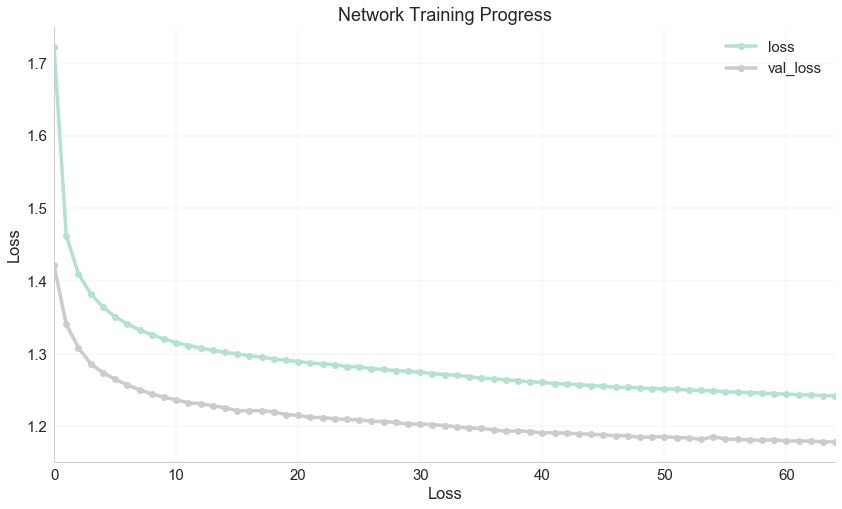

In [9]:
plot_curves(['loss', 'val_loss'], ylabel='Loss')

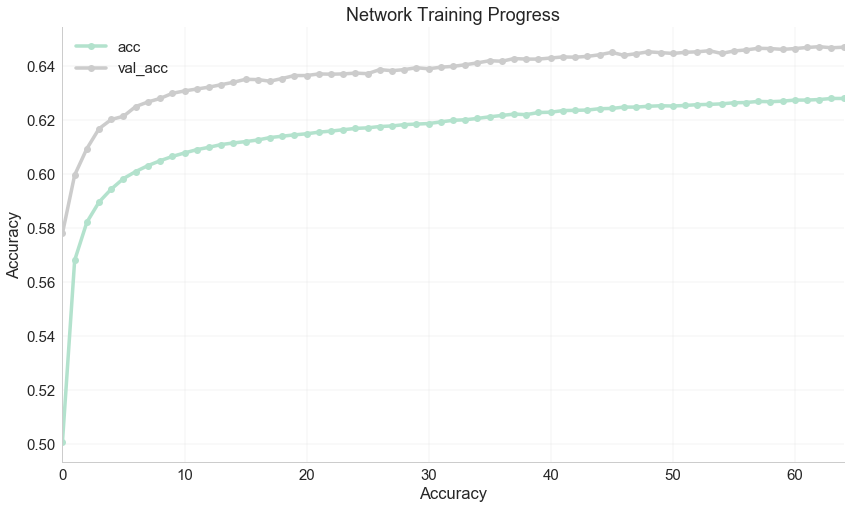

In [10]:
plot_curves(['acc', 'val_acc'], ylabel='Accuracy')

# Curve Fit the Loss Function

## Function

$$
f(x) = Ae^{-Bx} + C
$$

In [11]:
def f(x, a, b, c):
    return a * np.exp(-b * x) + c

## Fit the Parameters

In [12]:
x = np.arange(len(df.val_loss.values))
y = df.val_loss.values

(a, b, c), err = sp.optimize.curve_fit(f,  x,  y)

## Check Error

In [13]:
print(a, b, c)
print(err)

0.177427654626 0.135726799685 1.19127299907
[[  5.79382297e-05   4.11939020e-05  -9.37001239e-07]
 [  4.11939020e-05   1.08956730e-04   1.11014919e-05]
 [ -9.37001239e-07   1.11014919e-05   3.87258040e-06]]


f(x) = 0.177e^-0.136x + 1.191


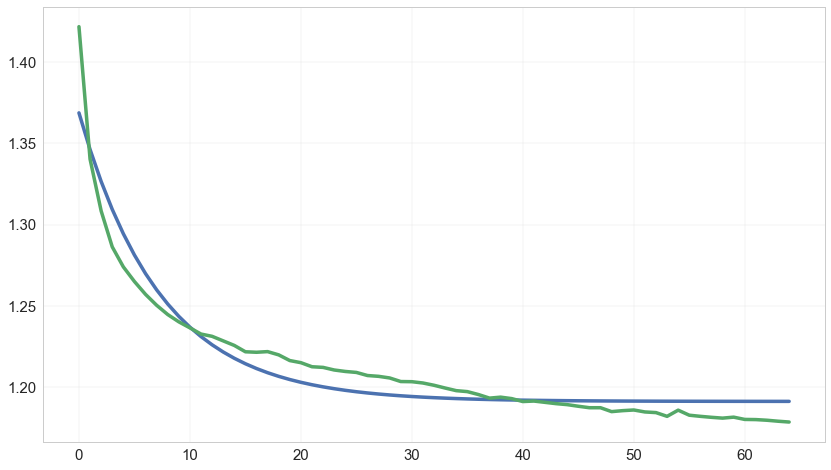

In [14]:
X = np.arange(0, 100)

print('f(x) = {a:.3f}e^-{b:.3f}x + {c:.3f}'.format(a=a,b=b,c=c))
plt.plot(x, f(x, a, b, c))
plt.plot(x, y);

# Check Where Validation Loss Improved

In [21]:
val_loss_diff = pd.Series(df.val_loss.values[:-1] - df.val_loss.values[1:])

for i in val_loss_diff:
    print('{0:.4f}'.format(i))

0.0814
0.0319
0.0221
0.0123
0.0090
0.0079
0.0067
0.0057
0.0045
0.0037
0.0038
0.0014
0.0028
0.0028
0.0039
0.0003
-0.0004
0.0020
0.0035
0.0013
0.0025
0.0004
0.0016
0.0009
0.0006
0.0019
0.0005
0.0010
0.0022
0.0001
0.0008
0.0014
0.0017
0.0016
0.0006
0.0018
0.0022
-0.0006
0.0009
0.0018
-0.0003
0.0008
0.0008
0.0006
0.0010
0.0009
0.0000
0.0024
-0.0006
-0.0004
0.0012
0.0004
0.0023
-0.0038
0.0031
0.0007
0.0006
0.0005
-0.0006
0.0014
0.0001
0.0004
0.0006
0.0005


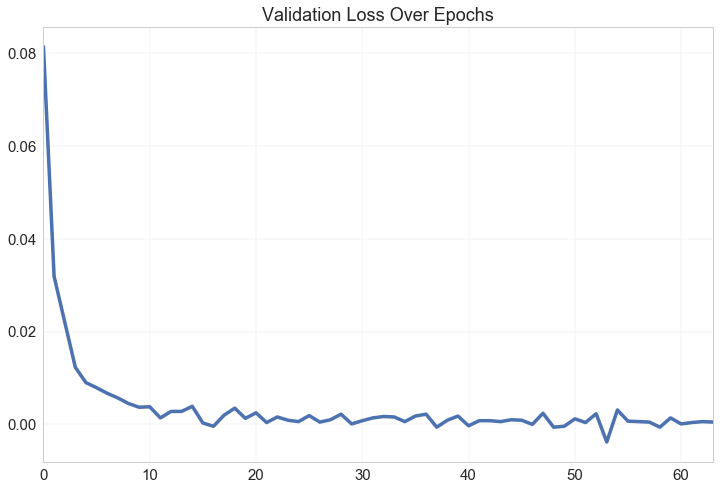

In [16]:
val_loss_diff.plot(figsize=(12,8),
                   title='Validation Loss Over Epochs');